# 4.10 Instacart Key Questions

## Contents

    1. Importing libraries and importing df from 4.10 part 1
    
    2. Key questions and visualizations
     2A. Busiest days of the week and hours of the day
     2B. Time of day when the most money is spent
     2C. Creating price range groupings for products
     2D. Frequency of orders by department
     2E. Ordering behaviors of diffrent types of customers
        - Distribution of customers baised on loyalty status
        - Differences in ordering habits based on loyalty staus
        - Differences in ordering habits based on region
        - Ordering habits of age groups and family size
        - Ordering habits of income groups
    3. Exporting visualizations and df

## 1. Import libraries and df

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path

path = r'/Users/jonathanfava/07-2022 Instacart Basket Analysis'

In [3]:
# import df

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_410_p1.pkl'))

In [4]:
# set pandas to show all columns in df

pd.set_option('display.max_columns',100)

In [5]:
# check import 

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,days_since_prior_order,returning_customer,add_to_cart_order,reordered,_merge,prices_range_loc,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_ord_freq,frequency_flag,gender,state,age,date_joined,#_dependants,marital_status,income,region,activity_flag,age_profile,income_profile,Unnamed: 0,department,has_baby,has_pets,alcohol_consumer,family_size
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,True,5.0,0.0,both,NaN,Mid range product,Regularly Busy,Slowest days,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,True,1.0,1.0,both,NaN,Mid range product,Regularly Busy,Slowest days,Average Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,True,3.0,0.0,both,NaN,Low range product,Regularly Busy,Slowest days,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small
30,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,7.0,True,2.0,0.0,both,NaN,Low range product,Busiest day,Busiest days,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small
41,13424,Almonds,45,19,4.2,3139998,138,28,6,11,3.0,True,4.0,0.0,both,NaN,Low range product,Regularly Busy,Slowest days,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small


In [6]:
# drop redundant or unnecessary columns

df.drop(columns=['_merge', 'prices_range_loc', 'Unnamed: 0'])

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,days_since_prior_order,returning_customer,add_to_cart_order,reordered,price_range_loc,busiest day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,med_ord_freq,frequency_flag,gender,state,age,date_joined,#_dependants,marital_status,income,region,activity_flag,age_profile,income_profile,department,has_baby,has_pets,alcohol_consumer,family_size
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,True,5.0,0.0,Mid range product,Regularly Busy,Slowest days,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no,small
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,True,1.0,1.0,Mid range product,Regularly Busy,Slowest days,Average Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no,small
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,True,3.0,0.0,Low range product,Regularly Busy,Slowest days,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no,small
30,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,7.0,True,2.0,0.0,Low range product,Busiest day,Busiest days,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no,small
41,13424,Almonds,45,19,4.2,3139998,138,28,6,11,3.0,True,4.0,0.0,Low range product,Regularly Busy,Slowest days,Most Orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400733,25524,Infant Formula With Iron,92,18,4.4,1137249,154028,1,1,16,NaN,False,1.0,0.0,Low range product,Regularly Busy,Busiest days,Most Orders,4,New customer,5.860000,Low spender,30.0,Loyal customer,Female,Delaware,62,8/25/2018,0,divorced/widowed,49144,South,Low activity,Senior,low,babies,yes,no,no,single
32401484,49215,Kids Sensible Foods Broccoli Littles,92,18,2.0,757647,6228,1,6,15,NaN,False,3.0,0.0,Low range product,Regularly Busy,Slowest days,Most Orders,4,New customer,6.850000,Low spender,15.0,Regular customer,Female,Colorado,46,3/14/2017,2,married,46523,West,Low activity,Middle Aged,low,babies,yes,no,no,small
32402049,28337,Swaddlers Diapers Giant Pack - Size 3,56,18,11.8,3219892,126356,1,3,19,NaN,False,1.0,0.0,Mid range product,Regularly Busy,Slowest days,Average Orders,3,New customer,7.360000,Low spender,8.0,Frequent customer,Male,North Dakota,22,12/13/2017,0,single,68385,Midwest,Low activity,Young adult,middle,babies,yes,no,no,single
32402050,37289,Morning Mish Mash Blueberry Oats & Quinoa Snack,92,18,11.2,361832,126356,2,0,18,30.0,True,1.0,0.0,Mid range product,Busiest day,Busiest days,Average Orders,3,New customer,7.360000,Low spender,8.0,Frequent customer,Male,North Dakota,22,12/13/2017,0,single,68385,Midwest,Low activity,Young adult,middle,babies,yes,no,no,single


## 2. Key questions and visualizations

#### 2A. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

Text(0.5, 1.0, 'Busiest Days of the Week')

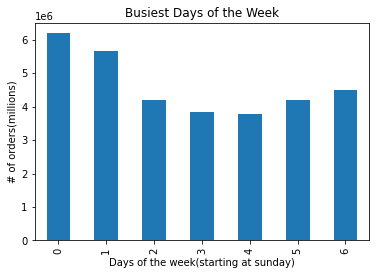

In [7]:
# create bar chart to show busiest days of the week

dow_bar = df['order_day_of_week'].value_counts().sort_index().plot.bar()

plt.ylabel('# of orders(millions)')
plt.xlabel('Days of the week(starting at sunday)')
plt.title('Busiest Days of the Week')

Text(0.5, 1.0, 'Busiest Time of Day')

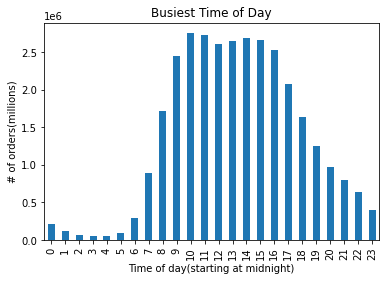

In [8]:
# create bar chart to show busiest time of day

tod_bar = df['time_of_order'].value_counts().sort_index().plot.bar()

plt.ylabel('# of orders(millions)')
plt.xlabel('Time of day(starting at midnight)')
plt.title('Busiest Time of Day')

#### 2B. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

Text(0.5, 1.0, 'Total Spent by Hour')

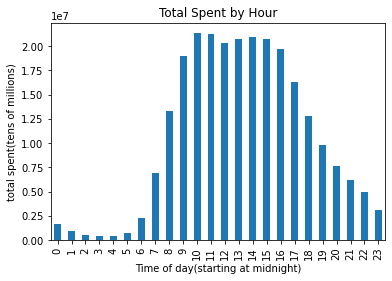

In [9]:
# create bar chart for total spent by hour

tod_spending = df.groupby(['time_of_order'])['prices'].sum().plot.bar()

plt.ylabel('total spent(tens of millions)')
plt.xlabel('Time of day(starting at midnight)')
plt.title('Total Spent by Hour')

In [10]:
# chart used from 4.9

#### 2C. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0.5, 1.0, 'Prices of Products Sold')

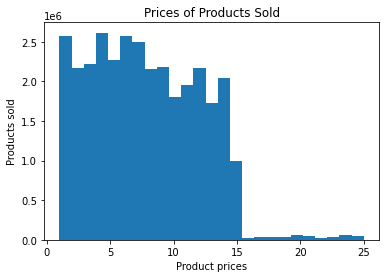

In [11]:
# create chart showing distrubiton of product prices

product_prices_hist = df['prices'].plot.hist(bins = 25)

plt.ylabel('Products sold')
plt.xlabel('Product prices')
plt.title('Prices of Products Sold')

In [12]:
# creating column and price range groupings

df.loc[df['prices'] <=5, 'price_range'] = 'cheap'

In [13]:
df.loc[(df['prices'] > 5) & (df['prices'] <= 10), 'price_range'] = 'mid'

In [14]:
df.loc[(df['prices'] > 10) & (df['prices'] <= 15), 'price_range'] = 'high'

In [15]:
df.loc[df['prices'] >15, 'price_range'] = 'expensive'

Text(0.5, 1.0, 'Products Sold by Price Range')

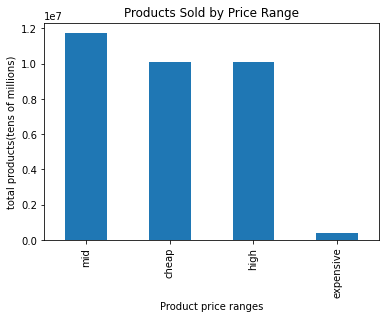

In [16]:
# creat bar chart to display new price range groupings

price_group_bar = df['price_range'].value_counts().plot.bar()
plt.ylabel('total products(tens of millions)')
plt.xlabel('Product price ranges')
plt.title('Products Sold by Price Range')

#### 2D. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

Text(0.5, 1.0, 'Products Sold by Department')

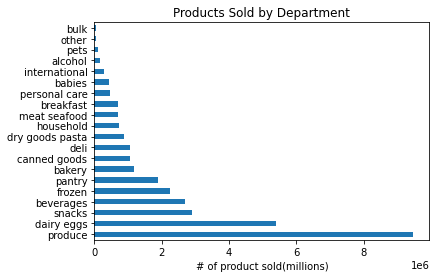

In [17]:
# create chart for amount of products ordered in each department

dep_bar = df['department'].value_counts().plot.barh()
plt.xlabel('# of product sold(millions)')
plt.title('Products Sold by Department')

#### 2E. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ.

#### ● What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

Text(0.5, 1.0, 'Distrubtion of Customers by Loyalty')

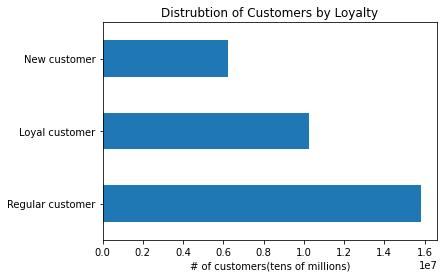

In [18]:
# create chart for distrubiton of customers baised on the loyalty flag column

loyalty_bar = df['loyalty_flag'].value_counts().plot.barh()
plt.xlabel('# of customers(tens of millions)')
plt.title('Distrubtion of Customers by Loyalty')

#### ● Are there differences in ordering habits based on a customer’s loyalty status?

In [20]:
# statiscs for the prices of items bought by loyalty flag

df.groupby(['loyalty_flag']).agg({'prices': ['min', 'max', 'mean']})

prices                
                    min   max      mean
loyalty_flag                           
Loyal customer      1.0  25.0  7.772134
New customer        1.0  25.0  7.798940
Regular customer    1.0  25.0  7.796296

In [21]:
# statistics for med days since prior order by loyalty flag

df.groupby(['loyalty_flag']).agg({'med_ord_freq': ['min', 'max', 'mean']})

med_ord_freq                 
                          min   max       mean
loyalty_flag                                  
Loyal customer            0.0  14.0   5.170693
New customer              0.0  30.0  18.471601
Regular customer          0.0  30.0  10.615556

In [22]:
# statistics for time of order by loyalty flag

df.groupby(['loyalty_flag']).agg({'time_of_order': ['min', 'max', 'mean']})

time_of_order               
                           min max       mean
loyalty_flag                                 
Loyal customer               0  23  13.188133
New customer                 0  23  13.674115
Regular customer             0  23  13.480744

In [23]:
# statistics for order day of the week by loyalty flag

df.groupby(['loyalty_flag']).agg({'order_day_of_week': ['min', 'max', 'mean']})

order_day_of_week              
                               min max      mean
loyalty_flag                                    
Loyal customer                   0   6  2.791515
New customer                     0   6  2.697319
Regular customer                 0   6  2.720812

In [24]:
# statistics for avg spent by loyalty flag

df.groupby(['loyalty_flag']).agg({'avg_spent': ['min', 'max', 'mean']})

avg_spent                         
                       min           max       mean
loyalty_flag                                       
Loyal customer    2.387671   8794.882427  10.387961
New customer      1.000000  25005.425000  13.298039
Regular customer  1.308333   4506.269204  12.495594

#### ● Are there differences in ordering habits based on a customer’s region?

Text(0.5, 1.0, 'Distribution of Customers by region')

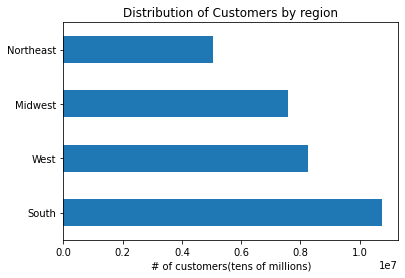

In [25]:
# create chart for distribition of customers baised on the loyalty flag column

loyalty_bar = df['region'].value_counts().plot.barh()
plt.xlabel('# of customers(tens of millions)')
plt.title('Distribution of Customers by region')

In [26]:
# statiscs for the prices of items bought by region

df.groupby(['region']).agg({'prices': ['min', 'max', 'mean']})

prices                
             min   max      mean
region                          
Midwest      1.0  25.0  7.790722
Northeast    1.0  25.0  7.783265
South        1.0  25.0  7.793138
West         1.0  25.0  7.788351

In [27]:
# statistics for days since prior order by region

df.groupby(['region']).agg({'days_since_prior_order': ['min', 'max', 'mean']})

days_since_prior_order                 
                             min   max       mean
region                                           
Midwest                      0.0  30.0  11.183894
Northeast                    0.0  30.0  11.086239
South                        0.0  30.0  11.109980
West                         0.0  30.0  11.049096

In [28]:
# statistics for time of order by region

df.groupby(['region']).agg({'time_of_order': ['min', 'max', 'mean']})

time_of_order               
                    min max       mean
region                                
Midwest               0  23  13.444368
Northeast             0  23  13.422654
South                 0  23  13.416910
West                  0  23  13.418509

In [29]:
# statistics for order day of the week by region

df.groupby(['region']).agg({'order_day_of_week': ['min', 'max', 'mean']})

order_day_of_week              
                        min max      mean
region                                   
Midwest                   0   6  2.738702
Northeast                 0   6  2.736582
South                     0   6  2.740519
West                      0   6  2.739110

In [30]:
# statistics for amount of avg spent by region

df.groupby(['region']).agg({'avg_spent': ['min', 'max', 'mean']})

avg_spent                         
                min           max       mean
region                                      
Midwest         1.0  25005.425000  12.718972
Northeast       1.1   7414.485185  11.752581
South           1.0  15006.940000  12.194909
West            1.0  10209.987755  11.319669

#### ● Is there a connection between age and family status in terms of Loyalty?

Text(0.5, 1.0, 'Family Size and Age Profile')

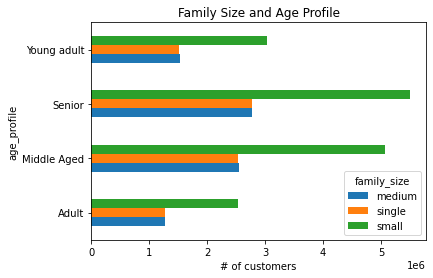

In [31]:
# create bar chart for the distribution family size and age 

fam_age_bar = pd.crosstab(df['age_profile'], df ['family_size']).plot.barh()
plt.xlabel('# of customers')
plt.title('Family Size and Age Profile')

In [32]:
# avg day of the week an order is placed per age profile 

df.groupby(['age_profile']).agg({'order_day_of_week': ['min', 'max', 'mean']})

order_day_of_week              
                          min max      mean
age_profile                                
Adult                       0   6  2.720660
Middle Aged                 0   6  2.741353
Senior                      0   6  2.744642
Young adult                 0   6  2.738682

In [33]:
# avg day of the week an order is placed per family size

df.groupby(['family_size']).agg({'order_day_of_week': ['min', 'max', 'mean']})

order_day_of_week              
                          min max      mean
family_size                                
medium                      0   6  2.729985
single                      0   6  2.733688
small                       0   6  2.745662

In [34]:
# avg time of order per age group

df.groupby(['age_profile']).agg({'time_of_order': ['min', 'max', 'mean']})

time_of_order               
                      min max       mean
age_profile                             
Adult                   0  23  13.421631
Middle Aged             0  23  13.434056
Senior                  0  23  13.430699
Young adult             0  23  13.402777

In [35]:
# avg time of order per family size

df.groupby(['family_size']).agg({'time_of_order': ['min', 'max', 'mean']})

time_of_order               
                      min max       mean
family_size                             
medium                  0  23  13.435621
single                  0  23  13.433046
small                   0  23  13.415800

Text(0.5, 1.0, 'Age Profile and Loyalty Groups')

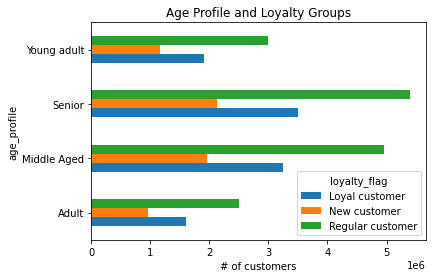

In [36]:
# create a customer loyalty by age group bar chart

age_loyalty_bar = pd.crosstab(df['age_profile'], df ['loyalty_flag']).plot.barh()
plt.xlabel('# of customers')
plt.title('Age Profile and Loyalty Groups')

Text(0.5, 1.0, 'Family Size and Loyalty Group')

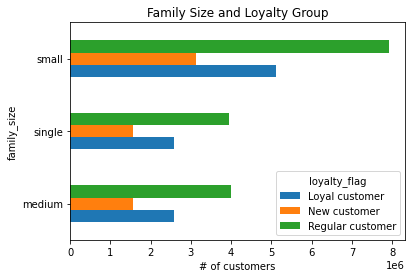

In [46]:
# create a customer loyalty by family size bar chart

fam_loyalty_bar = pd.crosstab(df['family_size'], df ['loyalty_flag']).plot.barh()
plt.xlabel('# of customers')
plt.title('Family Size and Loyalty Group')

#### ● What different classifications of income does the demographic information suggest? And what are their ordering habits?

Text(0.5, 1.0, 'Distribution of Customers by Income')

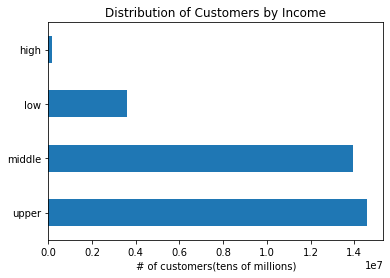

In [38]:
# create chart for distribition of customers baised on the loyalty flag column

loyalty_bar = df['income_profile'].value_counts().plot.barh()
plt.xlabel('# of customers(tens of millions)')
plt.title('Distribution of Customers by Income')

Text(0.5, 1.0, 'Income and Loyalty Group')

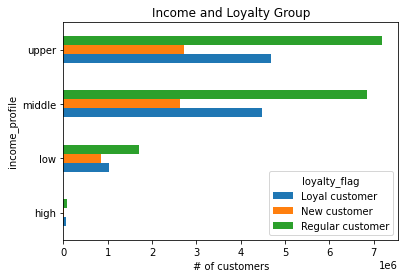

In [45]:
# create a customer loyalty by income bar chart

income_loyalty_bar = pd.crosstab(df['income_profile'], df ['loyalty_flag']).plot.barh()
plt.xlabel('# of customers')
plt.title('Income and Loyalty Group')

In [40]:
# statiscs for the prices of items bought income

df.groupby(['income_profile']).agg({'prices': ['min', 'max', 'mean']})

prices                
                  min   max      mean
income_profile                       
high              1.0  25.0  7.777417
low               1.0  25.0  6.694250
middle            1.0  25.0  7.892107
upper             1.0  25.0  7.959792

In [41]:
# statistics for med days since prior order by income

df.groupby(['income_profile']).agg({'med_ord_freq': ['min', 'max', 'mean']})

med_ord_freq                 
                        min   max       mean
income_profile                              
high                    0.0  30.0   9.315748
low                     0.0  30.0  11.125438
middle                  0.0  30.0  10.328450
upper                   0.0  30.0  10.303313

In [42]:
# statistics for time of order by income

df.groupby(['income_profile']).agg({'time_of_order': ['min', 'max', 'mean']})

time_of_order               
                         min max       mean
income_profile                             
high                       0  23  13.136352
low                        0  23  13.240988
middle                     0  23  13.432710
upper                      0  23  13.466625

In [43]:
# statistics for order day of the week by income

df.groupby(['income_profile']).agg({'order_day_of_week': ['min', 'max', 'mean']})

order_day_of_week              
                             min max      mean
income_profile                                
high                           0   6  2.797943
low                            0   6  2.751602
middle                         0   6  2.728071
upper                          0   6  2.745034

In [44]:
# statistics for avg spent by income

df.groupby(['income_profile']).agg({'avg_spent': ['min', 'max', 'mean']})

avg_spent                          
                     min           max        mean
income_profile                                    
high             24.1033  11772.100000  258.759674
low               1.0000     13.878571    6.696806
middle            1.1000   7700.025641    8.468671
upper             7.0000  25005.425000   13.556569

### 3. Exporting df and visualizations

In [48]:
# export vizulatizations

dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_bar.png'))

In [49]:
# export vizulatizations

tod_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'tod_bar.png'))

In [50]:
# export vizulatizations

tod_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'tod_spending.png'))

In [52]:
# export vizulatizations

product_prices_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_prices_hist.png'))

In [53]:
# export vizulatizations

price_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_group_bar.png'))

In [54]:
# export vizulatizations

dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_bar.png'))

In [55]:
# export vizulatizations

loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [56]:
# export vizulatizations

fam_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_age_bar.png'))

In [57]:
# export vizulatizations

age_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_loyalty_bar.png'))

In [59]:
# export vizulatizations

fam_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_loyalty_bar.png'))

In [60]:
# export vizulatizations

loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [61]:
# export vizulatizations
income_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_loyalty_bar.png'))

In [62]:
# export df as pickle

df.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'df_410_p2.pkl'))